In [1]:
import xpress as xp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Create a problem called location

location = xp.problem(name='location')

In [119]:
conda install -c anaconda openpyxl

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
# already existing charging points

charg_point_path = os.path.join('Project_data/Charging_points.xlsx')
charg_point = pd.read_excel(charg_point_path)

In [4]:
charg_point.head()

,CP ID,Type,geometry,Latitude,Longitude,grid number
0,51085,Slow,POINT (-3.011192785069142 56.47296514001275),56.472965,-3.011193,146
1,SCO50884,Fast,POINT (-3.057191218106697 56.46983341001484),56.469833,-3.057191,76
2,50264,Slow,POINT (-2.917475282989725 56.48982926001875),56.489829,-2.917475,304
3,50263,Slow,POINT (-2.91751565698979 56.48972199001865),56.489722,-2.917516,304
4,50274,Fast,POINT (-2.966478267037299 56.46149715999641),56.461497,-2.966478,214


In [5]:
charg_point.shape

(78, 6)

In [6]:
charg_point.iloc[-1]

CP ID                                                 51132
Type                                                   Fast
geometry       POINT (-2.984288107053444 56.45494890999196)
Latitude                                          56.454949
Longitude                                         -2.984288
grid number                                             185
Name: 77, dtype: object

In [7]:
demand_path = os.path.join('Project_data/Demand_data.xlsx')
demand = pd.read_excel(demand_path)

In [8]:
demand.loc[100:105]

,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,Demand_0,Demand_1,Demand_2,Demand_3
100,101,"POLYGON ((-3.044190289672857 56.4533005586958,...",0,0,0,0,0,1,4442.921761,"[86, 87, 88, 100, 102, 114, 115, 116]",0.0,0.000000,72.230017,241.821149
101,102,POLYGON ((-3.044324704148503 56.45819844677619...,0,0,0,0,0,3,4375.167312,"[87, 88, 89, 101, 103, 115, 116, 117]",0.0,444.631572,968.172278,1627.425046
102,103,POLYGON ((-3.044459160842206 56.46309633075683...,0,0,0,0,1,11,4374.844088,"[88, 89, 90, 102, 104, 116, 117, 118]",0.0,443.063371,1007.432635,1783.221659
103,104,POLYGON ((-3.044593659772223 56.46799421063793...,0,0,0,0,1,3,4441.966808,"[89, 90, 91, 103, 105, 117, 118, 119]",0.0,444.257814,1387.704616,2920.679769
104,105,POLYGON ((-3.044728200956817 56.47289208641969...,0,0,0,0,0,2,4573.566879,"[90, 91, 92, 104, 106, 118, 119, 120]",0.0,0.000000,488.563483,1595.447338
105,106,"POLYGON ((-3.044862784414267 56.4777899581023,...",0,0,0,0,0,1,4764.304294,"[91, 92, 93, 105, 107, 119, 120, 121]",0.0,0.000000,873.458540,2708.092266


In [9]:
print(demand.info)

<bound method DataFrame.info of      Ref                                           geometry  \
0      1  POLYGON ((-3.105818823440952 56.44296858524104...   
1      2  POLYGON ((-3.105961112538962 56.44786638257236...   
2      3  POLYGON ((-3.106103446316349 56.45276417577815...   
3      4  POLYGON ((-3.106245824792422 56.45766196485858...   
4      5  POLYGON ((-3.106388247986505 56.46255974981385...   
..   ...                                                ...   
429  430  POLYGON ((-2.841505846300256 56.48913269331089...   
430  431  POLYGON ((-2.841614325647596 56.49403083838651...   
431  432  POLYGON ((-2.841722839098455 56.49892897943724...   
432  433  POLYGON ((-2.841831386667599 56.50382711646336...   
433  434  POLYGON ((-2.841939968369799 56.50872524946503...   

     Number of Charging Points  Number of Slow Charging Points  \
0                            0                               0   
1                            0                               0   
2            

In [10]:
# points of interest in each grid

interest_point_path = os.path.join('Project_data/Interest _points.xlsx')
interest_point = pd.read_excel(interest_point_path)

In [11]:
interest_point.head()

,amenity,geometry,Latitude,Longitude,grid number
0,restaurant,POINT (-2.852617986940523 56.48412800000578),56.484128,-2.852618,400
1,restaurant,POINT (-2.849993386942502 56.47134889999293),56.471349,-2.849993,398
2,restaurant,POINT (-2.872495786961546 56.46693379999114),56.466934,-2.872496,369
3,restaurant,POINT (-2.873346686962511 56.46599179999032),56.465992,-2.873347,369
4,restaurant,POINT (-2.873426086962618 56.46584759999016),56.465848,-2.873426,369


In [12]:
amenity1 = set(interest_point['amenity'])
amenity1

# more cars at which place?
# for example, many restaurants at 369

{'restaurant', 'school', 'supermarket'}

In [13]:
# potential charging points
pt_charg_point_path = os.path.join('Project_data/Potential_charging_points.xlsx')
pt_charg_point = pd.read_excel(pt_charg_point_path)

In [14]:
pt_charg_point.head()

,amenity,geometry,Latitude,Longitude,grid number
0,parking,POINT (-3.046891287099621 56.46621650001012),56.466217,-3.046891,89
1,fuel,POINT (-2.848473686941031 56.47224079999363),56.472241,-2.848474,412
2,parking,POINT (-2.895034186977277 56.47320819999986),56.473208,-2.895034,328
3,fuel,POINT (-2.963304387034162 56.46350399999802),56.463504,-2.963304,228
4,fuel,POINT (-2.9776499870463 56.46097389999711),56.460974,-2.977650,200


In [15]:
print(pt_charg_point['grid number'])

0       89
1      412
2      328
3      228
4      200
      ... 
320     90
321     90
322     90
323    185
324    200
Name: grid number, Length: 325, dtype: int64


In [16]:
amenity2 = set(pt_charg_point['amenity'])
amenity2

{'fuel', 'parking'}

In [17]:
# Defining the index set

number_of_grids = 434
number_of_years = 4
grids = range(number_of_grids)
years = range(number_of_years)

In [18]:
# the demand every slow/ fast/ rapid chargers can satisfy
slow_c = [2000, 3500]
fast_c = [4000, 5200]
rapid_c = [30000, 50500]

# decision variables

In [19]:
# how many slow/ fast/ rapid connectors to have in each potential grid in year t
#x1 = np.array([xp.var( name='x1_{0}_{1}'.format(i,j+1))
                    #for i in years for j in grids], dtype=xp.integer).reshape(number_of_years, number_of_grids)
#x2 = np.array([xp.var( name='x2_{0}_{1}'.format(i,j+1))
                    #for i in years for j in grids], dtype=xp.integer).reshape(number_of_years, number_of_grids)
#x3 = np.array([xp.var( name='x3_{0}_{1}'.format(i,j+1))
                    #for i in years for j in grids], dtype=xp.integer).reshape(number_of_years, number_of_grids)
#location.addVariable(x1, x2, x3)

In [20]:
# how many slow/ fast/ rapid connectors to have in each potential grid in year t
x1 = np.array([xp.var(vartype = xp.integer, name='x1_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
x2 = np.array([xp.var(vartype = xp.integer, name='x2_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
x3 = np.array([xp.var(vartype = xp.integer, name='x3_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids]).reshape(number_of_years, number_of_grids)
location.addVariable(x1, x2, x3)

In [21]:
# for each grid, demand can be satisfied by this grid and its neighbours
y = np.array([xp.var( name='y_{0}_{1}'.format(t,i+1))
                    for t in years for i in grids], dtype=xp.npvar).reshape(number_of_years, number_of_grids)

# constraints

In [22]:
# check whether there is a grid with demand cannot be satisfied be itself or its neighbours
demand['sum_demand'] = demand.Demand_0 + demand.Demand_1 + demand.Demand_2 + demand.Demand_3

In [23]:
demand['sum_charg_point'] = demand['Number of Charging Points'] + demand['Number of Potential Locations']

In [24]:
demand.head()

,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,Demand_0,Demand_1,Demand_2,Demand_3,sum_demand,sum_charg_point
0,1,POLYGON ((-3.105818823440952 56.44296858524104...,0,0,0,0,0,0,8403.561223,"[2, 15, 16]",0.0,0.0,0.0,0.0,0.0,0
1,2,POLYGON ((-3.105961112538962 56.44786638257236...,0,0,0,0,0,0,8296.571785,"[1, 3, 15, 16, 17]",0.0,0.0,0.0,0.0,0.0,0
2,3,POLYGON ((-3.106103446316349 56.45276417577815...,0,0,0,0,0,0,8224.414999,"[2, 4, 16, 17, 18]",0.0,0.0,0.0,0.0,0.0,0
3,4,POLYGON ((-3.106245824792422 56.45766196485858...,0,0,0,0,0,0,8188.011805,"[3, 5, 17, 18, 19]",0.0,0.0,0.0,0.0,0.0,0
4,5,POLYGON ((-3.106388247986505 56.46255974981385...,0,0,0,0,0,0,8187.839098,"[4, 6, 18, 19, 20]",0.0,0.0,0.0,0.0,0.0,0


In [25]:
for ind in demand.index:
    # to calculate the sum of charging points and potential charging points of the grid itself and its neighbouts
    sum_charg = demand.loc[ind]['sum_charg_point']
    neighbour_list = demand.loc[ind]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        sum_charg += demand.loc[x]['sum_charg_point']
    if sum_charg == 0:
        if demand.loc[ind]['sum_demand'] != 0:
            print(ind+1)
    print(ind+1, demand.loc[ind]['sum_demand'], sum_charg)

1 0.0 0
2 0.0 0
3 0.0 0
4 0.0 0
5 0.0 0
6 0.0 0
7 0.0 0
8 0.0 0
9 0.0 0
10 0.0 0
11 0.0 0
12 0.0 0
13 0.0 0
14 0.0 0
15 0.0 0
16 0.0 0
17 0.0 0
18 0.0 0
19 0.0 0
20 0.0 0
21 0.0 0
22 0.0 0
23 0.0 0
24 0.0 0
25 0.0 0
26 0.0 0
27 0.0 0
28 0.0 0
29 0.0 0
30 0.0 0
31 0.0 0
32 0.0 0
33 0.0 0
34 0.0 0
35 0.0 0
36 0.0 0
37 0.0 0
38 0.0 0
39 0.0 0
40 0.0 0
41 0.0 0
42 0.0 0
43 0.0 0
44 0.0 0
45 0.0 0
46 0.0 2
47 0.0 2
48 0.0 2
49 0.0 0
50 0.0 0
51 0.0 0
52 0.0 0
53 0.0 0
54 0.0 0
55 0.0 0
56 0.0 0
57 0.0 0
58 0.0 0
59 0.0 0
60 0.0 5
61 480.22436170643203 9
62 0.0 10
63 0.0 5
64 0.0 1
65 0.0 0
66 0.0 0
67 0.0 0
68 0.0 0
69 0.0 0
70 0.0 0
71 0.0 0
72 0.0 0
73 0.0 3
74 0.0 21
75 554.167613160013 31
76 3869.958560944774 33
77 514.8147218611815 15
78 0.0 5
79 0.0 0
80 0.0 0
81 0.0 0
82 0.0 0
83 0.0 0
84 0.0 0
85 0.0 0
86 0.0 1
87 0.0 7
88 372.8452617139583 34
89 1008.4990683225363 46
90 948.5112069055126 47
91 823.6299264533479 21
92 0.0 12
93 0.0 5
94 0.0 5
95 0.0 1
96 0.0 1
97 0.0 0
98 0.0 0
99 0

In [26]:
print(demand.loc[121])

Ref                                                                              122
geometry                           POLYGON ((-3.036279197876319 56.48765989078385...
Number of Charging Points                                                          0
Number of Slow Charging Points                                                     0
Number of Fast Charging Points                                                     0
Number of Rapid Charging Points                                                    0
Number of PoI                                                                      0
Number of Potential Locations                                                      0
Distance from Centre                                                     4855.939663
NEIGHBORS                                   [107, 108, 109, 121, 123, 135, 136, 137]
Demand_0                                                                         0.0
Demand_1                                                         

In [27]:
# for each potential charging point, we can install one or more charging stations
grid_pt_charg = pt_charg_point.groupby('grid number').count()
grid_pt_charg

,amenity,geometry,Latitude,Longitude
grid number,,,,
61,2,2,2,2
75,3,3,3,3
76,4,4,4,4
77,1,1,1,1
88,3,3,3,3
...,...,...,...,...
385,1,1,1,1
397,1,1,1,1
399,2,2,2,2


In [28]:
num_grid_pt = number_of_grids*[0]
for ind in grid_pt_charg.index:
    # print(ind)
    # print(grid_pt_charg.iloc[ind]['grid number'])
    num_grid_pt[ind-1] = grid_pt_charg.loc[ind]['amenity']
num_grid_pt[75-1]

3

In [29]:
location.addConstraint(x1[t,i] >= 0 for t in years for i in grids)
location.addConstraint(x2[t,i] >= 0 for t in years for i in grids)
location.addConstraint(x3[t,i] >= 0 for t in years for i in grids)

for i in grids:
    #print(demand.loc[i]['Number of Potential Locations'])
    if demand.loc[i]['Number of Potential Locations'] == 0:
        location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] == 0 for t in years)

In [30]:
#location.addConstraint(sum((x1[t,i] + x2[t,i] + x3[t,i]) for t in years)>= num_grid_pt[i] for i in grids)

In [31]:
for ind in demand.index:
    if demand.loc[ind]['Number of Potential Locations'] == 0:
        location.addConstraint(x1[t,ind] == 0 for t in years)
        location.addConstraint(x2[t,ind] == 0 for t in years)
        location.addConstraint(x3[t,ind] == 0 for t in years)

In [32]:
print(demand.loc[demand['Ref'] == 102, 'Demand_1'].iloc[0])

444.6315721382473


In [33]:
# demand satisfied by existing charging points?
print(charg_point.loc[charg_point['grid number'] == 146, 'Type'].iloc[0])
# this does not work if 146 is not an existing grid

Slow


In [34]:
# for i in grids
    # if charg_point['grid number'] == 146???/\
        #if charg_point.loc[charg_point['grid number'] == 146, 'Type'].iloc[0] = 'slow'
        #a = 
        #if charg_point.loc[charg_point['grid number'] == 146, 'Type'].iloc[0] = 'fast'
        #if charg_point.loc[charg_point['grid number'] == 146, 'Type'].iloc[0] = 'rapid'
    # else

In [35]:
#for i in grids:
    #if i+1 in charg_point['grid number'].tolist():
        #print(i+1, charg_point.loc[charg_point['grid number'] == i+1, 'Type'].iloc[0])
        
# but in one grid, there might have existed more than 1 connectors
sat_demand = number_of_grids*[0]
for ind in charg_point.index:
    #print(ind, charg_point.iloc[ind]['grid number'], charg_point.iloc[ind]['Type'])
    # already satisfied demand
    if charg_point.iloc[ind]['Type'] == 'Slow':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* slow_c[1]
    elif charg_point.iloc[ind]['Type'] == 'Fast':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* fast_c[1]
    elif charg_point.iloc[ind]['Type'] == 'Rapid':
        sat_demand[charg_point.iloc[ind]['grid number']-1] += 2* rapid_c[1]

In [36]:
print(sat_demand[200-1])

62800


In [37]:
print(charg_point.loc[charg_point['grid number'] == 200, 'Type'])

68    Fast
69    Fast
70    Slow
71    Slow
72    Slow
73    Slow
74    Slow
75    Slow
Name: Type, dtype: object


In [38]:
print(charg_point['grid number'].tolist())

[146, 76, 304, 304, 214, 134, 314, 214, 199, 199, 147, 263, 199, 129, 186, 216, 216, 216, 216, 216, 300, 216, 216, 216, 216, 216, 345, 369, 369, 301, 300, 274, 263, 259, 288, 205, 205, 150, 163, 76, 117, 117, 59, 91, 103, 144, 190, 189, 159, 189, 189, 189, 189, 189, 190, 189, 160, 160, 160, 173, 173, 228, 228, 228, 214, 214, 214, 199, 200, 200, 200, 200, 200, 200, 200, 200, 202, 185]


In [39]:
# neighbour grids
grid_neighbor = demand['NEIGHBORS']
print(grid_neighbor[0])
grid_neighbor[100:105]

[2, 15, 16]


100    [86, 87, 88, 100, 102, 114, 115, 116]
101    [87, 88, 89, 101, 103, 115, 116, 117]
102    [88, 89, 90, 102, 104, 116, 117, 118]
103    [89, 90, 91, 103, 105, 117, 118, 119]
104    [90, 91, 92, 104, 106, 118, 119, 120]
Name: NEIGHBORS, dtype: object

In [40]:
#neighbor = demand['NEIGHBORS'].to_numpy()
#neighbor = [np.array(ne[1:-1].replace(' ', '').split(','), dtype = int) for ne in neighbor]
#print(neighbor)

In [41]:
for i in grids:
    y[0,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(1))
    y[1,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(2))
    y[2,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(3))
    y[3,i] = xp.Sum((slow_c[1]*x1[t1,i] + fast_c[1]*x2[t1,i] + rapid_c[1]*x3[t1,i] + sat_demand[i]) for t1 in range(4))



for ind in demand.index:
    #print(demand.loc[ind]['Ref'],demand.loc[ind]['NEIGHBORS'])
    i = demand.loc[ind]['Ref']-1
    neighbour_list = demand.loc[ind]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        
        x = int(x)-1
        y[0,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(1))
        y[1,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(2))
        y[2,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(3))
        y[3,i] += xp.Sum((slow_c[1]*x1[t1,x] + fast_c[1]*x2[t1,x] + rapid_c[1]*x3[t1,x] + sat_demand[x]) for t1 in range(4))

In [42]:
# satisfying demand of the 4 years
# not necessary, just putting it here for now
# demand can also be satisfied by neighbour girds
location.addConstraint(y[0,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_0'].iloc[0] for i in grids)
location.addConstraint(y[1,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_1'].iloc[0] for i in grids)
location.addConstraint(y[2,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_2'].iloc[0] for i in grids)
location.addConstraint(y[3,i]>= 0.8*demand.loc[demand['Ref'] == i+1, 'Demand_3'].iloc[0] for i in grids)

In [43]:
# grid number of existing charging points
ex_pt = charg_point['grid number'].tolist()
# grid number of potential charging points
po_pt = pt_charg_point['grid number'].tolist()
all_pt = ex_pt + po_pt
# combine existing charging points and potential ones
# remove duplicates and sort it
all_pt = sorted(list(dict.fromkeys(all_pt)))
all_pt[:10]

[59, 61, 75, 76, 77, 88, 89, 90, 91, 101]

In [44]:
print(len(all_pt))

111


In [45]:
# more than one potential charging stations in one grid
# for potential charging stations in the same grid, they have different geometry
print(len(po_pt))
print(len(list(dict.fromkeys(po_pt))))

325
98


In [46]:
pt_charg_point.sort_values('grid number')
pt_charg_point

,amenity,geometry,Latitude,Longitude,grid number
0,parking,POINT (-3.046891287099621 56.46621650001012),56.466217,-3.046891,89
1,fuel,POINT (-2.848473686941031 56.47224079999363),56.472241,-2.848474,412
2,parking,POINT (-2.895034186977277 56.47320819999986),56.473208,-2.895034,328
3,fuel,POINT (-2.963304387034162 56.46350399999802),56.463504,-2.963304,228
4,fuel,POINT (-2.9776499870463 56.46097389999711),56.460974,-2.977650,200
...,...,...,...,...,...
320,parking,POINT (-3.049633514318001 56.46803411923985),56.468034,-3.049634,90
321,parking,POINT (-3.04807983709986 56.46847420001244),56.468474,-3.048080,90
322,parking,POINT (-3.049187742371133 56.46811767026757),56.468118,-3.049188,90
323,parking,POINT (-2.984290155389708 56.45541694403015),56.455417,-2.984290,185


In [47]:
# not too many charging stations in one grid, not too many traffic in city centre
# as to the solution requirements
# 1 The council wants to limit the number of charging point locations in each grid square as this may 
# result in too much traffic in the grid square.
# 2 The council also to limit the number of charging stations in the city centre. Generally
# the largest demand for recharging facilities in the centre of town, however, if all this
# demand is satisfied in the city centre it may result in increase traffic in the city centre.

In [48]:
num_charg_point = demand['Number of Charging Points']
num_charg_point.sort_values()
num_charg_point.sum()

48

In [49]:
num_pt_charg_point = demand['Number of Potential Locations']
num_pt_charg_point.sort_values()

0       0
293     0
292     0
291     0
288     0
       ..
102    11
88     13
198    13
185    15
199    18
Name: Number of Potential Locations, Length: 434, dtype: int64

In [50]:
num_pt_charg_point.sum()

324

In [51]:
demand_zero = demand['Demand_0']

demand_zero.max()/slow_c[0] - demand.loc[368]['Number of Charging Points']

33.7308805

In [52]:
demand_one = demand['Demand_1']
demand_one.max()/slow_c[0] - demand.loc[368]['Number of Charging Points']

33.7308805

In [53]:
demand_two = demand['Demand_2']
demand_two.sort_values()
demand_two.max()/slow_c[0] - demand.loc[198]['Number of Charging Points']

35.11488696089882

In [54]:
demand_three = demand['Demand_3']
demand_three.sort_values()
demand_three.max()/slow_c[0] - demand.loc[198]['Number of Charging Points']

43.5322072635937

In [55]:
demand_one = demand['Demand_1']
demand_one.sort_values()

0          0.000000
296        0.000000
295        0.000000
294        0.000000
293        0.000000
           ...     
213    29378.401649
199    37365.240941
133    65264.576899
198    66431.561124
368    71461.761000
Name: Demand_1, Length: 434, dtype: float64

In [56]:
demand.loc[368]

Ref                                                                              369
geometry                           POLYGON ((-2.8763558450449 56.46439706728959, ...
Number of Charging Points                                                          2
Number of Slow Charging Points                                                     0
Number of Fast Charging Points                                                     1
Number of Rapid Charging Points                                                    1
Number of PoI                                                                     10
Number of Potential Locations                                                      7
Distance from Centre                                                     5999.689193
NEIGHBORS                                   [354, 355, 356, 368, 370, 382, 383, 384]
Demand_0                                                                   71461.761
Demand_1                                                         

In [57]:
demand_zero = demand['Demand_0']
demand_zero.sort_values()

0          0.000
293        0.000
292        0.000
291        0.000
290        0.000
         ...    
199    29688.999
189    38170.244
198    61799.099
133    64797.950
368    71461.761
Name: Demand_0, Length: 434, dtype: float64

In [58]:
max_grid_demand = demand.loc[368]['Demand_0']+demand.loc[368]['Demand_1']+demand.loc[368]['Demand_2']+demand.loc[368]['Demand_3']

In [59]:
# as to the solution requirements
# 1 The council wants to limit the number of charging point locations in each grid square as this may 
# result in too much traffic in the grid square.
# 2 The council also to limit the number of charging stations in the city centre. Generally
# the largest demand for recharging facilities in the centre of town, however, if all this
# demand is satisfied in the city centre it may result in increase traffic in the city centre.

In [60]:
# we can minimize the (distance from city center * number of chargers for each grid) 
# use the dataframe demand
grid_dis = demand['Distance from Centre']
#demand.iloc[demand['Distance from Centre'] == grid_dis.min()]
grid_dis.sort_values()

214     270.076114
213     275.262283
228     604.578858
227     606.913349
200     612.375019
          ...     
27     9227.509196
432    9395.886624
12     9403.456756
433    9676.341567
13     9683.692459
Name: Distance from Centre, Length: 434, dtype: float64

for i in grids:
    grid_max_0 = (demand.loc[demand['Ref']== i+1]['Demand_0']/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_1 = (demand.loc[demand['Ref']== i+1]['Demand_1']/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_2 = (demand.loc[demand['Ref']== i+1]['Demand_2']/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_3 = (demand.loc[demand['Ref']== i+1]['Demand_3']/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_3 for t in range(3,4))

In [61]:
for i in grids:
    nearby_demand_0 = demand.loc[demand['Ref']== i+1]['Demand_0']
    nearby_demand_1 = demand.loc[demand['Ref']== i+1]['Demand_1']
    nearby_demand_2 = demand.loc[demand['Ref']== i+1]['Demand_2']
    nearby_demand_3 = demand.loc[demand['Ref']== i+1]['Demand_3']
    neighbour_list = demand.loc[i]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        nearby_demand_0 += demand.loc[x]['Demand_0']
        nearby_demand_1 += demand.loc[x]['Demand_1']
        nearby_demand_2 += demand.loc[x]['Demand_2']
        nearby_demand_3 += demand.loc[x]['Demand_3']
    
    grid_max_0 = (0.8*nearby_demand_0/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_1 = (0.8*nearby_demand_1/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_2 = (0.8*nearby_demand_2/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_3 = (0.8*nearby_demand_3/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_3 for t in range(3,4))

In [62]:
center_grid = [184,185,186,187,188,198,199,200,201,202,212,213,214,215,216,226,227,228,229,230,240,241,242,243,244]

In [63]:
for i in center_grid:
    i = i-1
    nearby_demand_0 = demand.loc[demand['Ref']== i+1]['Demand_0']
    nearby_demand_1 = demand.loc[demand['Ref']== i+1]['Demand_1']
    nearby_demand_2 = demand.loc[demand['Ref']== i+1]['Demand_2']
    nearby_demand_3 = demand.loc[demand['Ref']== i+1]['Demand_3']
    neighbour_list = demand.loc[i]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        nearby_demand_0 += demand.loc[x]['Demand_0']
        nearby_demand_1 += demand.loc[x]['Demand_1']
        nearby_demand_2 += demand.loc[x]['Demand_2']
        nearby_demand_3 += demand.loc[x]['Demand_3']
    
    grid_max_0 = (0.6*nearby_demand_0/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_1 = (0.6*nearby_demand_1/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_2 = (0.6*nearby_demand_2/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    grid_max_3 = (0.6*nearby_demand_3/slow_c[0] - 2*demand.loc[demand['Ref']== i+1]['Number of Charging Points'])[i]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i] + x2[t,i] + x3[t,i] <= grid_max_3 for t in range(3,4))

for i in center_grid:
    #print(demand.loc[demand['Ref']== x]['Number of Potential Locations'])
    #print(type(x))
    
    
    grid_max_0 = (0.8*demand.loc[demand['Ref']== i]['Demand_0']/slow_c[0] - 2*demand.loc[demand['Ref']== i]['Number of Charging Points'])[i-1]
    grid_max_1 = (0.8*demand.loc[demand['Ref']== i]['Demand_1']/slow_c[0] - 2*demand.loc[demand['Ref']== i]['Number of Charging Points'])[i-1]
    grid_max_2 = (0.8*demand.loc[demand['Ref']== i]['Demand_2']/slow_c[0] - 2*demand.loc[demand['Ref']== i]['Number of Charging Points'])[i-1]
    grid_max_3 = (0.8*demand.loc[demand['Ref']== i]['Demand_3']/slow_c[0] - 2*demand.loc[demand['Ref']== i]['Number of Charging Points'])[i-1]
    if grid_max_0 < 0:
        grid_max_0 = 0
    if grid_max_1 < 0:
        grid_max_1 = 0
    if grid_max_2 < 0:
        grid_max_2 = 0
    if grid_max_3 < 0:
        grid_max_3 = 0
    location.addConstraint(x1[t,i-1] + x2[t,i-1] + x3[t,i-1] <= grid_max_0 for t in range(1))
    location.addConstraint(x1[t,i-1] + x2[t,i-1] + x3[t,i-1] <= grid_max_1 for t in range(1,2))
    location.addConstraint(x1[t,i-1] + x2[t,i-1] + x3[t,i-1] <= grid_max_2 for t in range(2,3))
    location.addConstraint(x1[t,i-1] + x2[t,i-1] + x3[t,i-1] <= grid_max_3 for t in range(3,4))

In [64]:
(demand['Demand_0']/2000 - demand['Number of Charging Points']).sort_values()

172    -1.450885
149    -0.527280
228    -0.074930
162    -0.064775
292     0.000000
         ...    
188     6.966570
189    16.085122
198    27.899550
133    31.398975
368    33.730880
Length: 434, dtype: float64

In [65]:
(demand['Demand_1']/2000 - demand['Number of Charging Points']).sort_values()

189    -3.000000
262    -2.000000
303    -2.000000
172    -2.000000
149    -1.000000
         ...    
199    10.682620
213    11.689201
198    30.215781
133    31.632288
368    33.730880
Length: 434, dtype: float64

In [66]:
(demand['Demand_2']/2000 - demand['Number of Charging Points']).sort_values()

189    -3.000000
303    -2.000000
262    -2.000000
172    -2.000000
149    -1.000000
         ...    
199    17.024442
213    18.865873
133    33.215692
368    34.637790
198    35.114887
Length: 434, dtype: float64

In [67]:
(demand['Demand_3']/2000 - demand['Number of Charging Points']).sort_values()

189    -3.000000
172    -2.000000
262    -2.000000
303    -2.000000
149    -1.000000
         ...    
199    26.991554
213    29.023368
133    36.268088
368    36.502130
198    43.532207
Length: 434, dtype: float64

In [68]:
# existing: number of all charging points, number of rapid charging point
num_charg_point = demand['Number of Charging Points'].sum()
num_rapid_charg = demand['Number of Rapid Charging Points'].sum()
print(num_rapid_charg/ num_charg_point)

0.10416666666666667


# limit on ratio of rapid chargers

location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) <= 
                       0.3*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))

In [69]:
location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x1[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x2[t,i] for t in years for i in grids) >= 
                       0.2*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
location.addConstraint(xp.Sum(x3[t,i] for t in years for i in grids) <= 
                       0.4*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
#location.addConstraint(xp.Sum(x1[t,i] for t in years for i in grids) <= 
#                       0.8*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
#location.addConstraint(xp.Sum(x2[t,i] for t in years for i in grids) <= 
#                       0.8*xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))

# objective function

coef_grid = number_of_grids*[1]

for ind in interest_point.index:
    interest_grid = interest_point.loc[ind]['grid number'] - 1
    coef_grid[interest_grid] *= 1.1
print(coef_grid)

# how many interest points in this grid
grid_interest_number = interest_point.groupby('grid number').count()
grid_interest_list = number_of_grids*[0]
for ind in grid_interest_number.index:
    #print(ind-1, grid_interest_number.loc[ind][0])
    grid_interest_list[ind-1] = grid_interest_number.loc[ind][0]
print(grid_interest_list)

for i in grids:
    neighbour_list = demand.loc[i]['NEIGHBORS'].strip('[').strip(']').replace(' ','')
    #print(neighbour_list)
    neighbour_list = neighbour_list.split(',')
    for x in neighbour_list:
        x = int(x)-1
        coef_grid[i] *= 1.05**grid_interest_list[x]
print(coef_grid)

In [70]:
#location.setObjective(xp.Sum((9676.341567 - grid_dis[i])*xp.Sum((x1[t,i] + x2[t,i] + x3[t,i]) for t in years) 
#                         for i in grids), 
#                  sense = xp.minimize)

location.setObjective(xp.Sum(coef_grid[i]* xp.Sum((slow_c[0]+slow_c[1])/2*x1[t,i] + 
                                                  (fast_c[0]+fast_c[1])/2*x2[t,i] + 
                                                  (rapid_c[0]+rapid_c[1])/2*x3[t,i] for t in years) for i in grids), 
                  sense = xp.maximize)

In [71]:
charg_pt_exist = number_of_grids*[0]
for ind in demand.index:
    if demand.loc[ind]['Number of Charging Points'] > 0:
        charg_pt_exist[ind] = 1

sum(charg_pt_exist)

22

In [72]:
location.setObjective(xp.Sum(charg_pt_exist[i]* xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years) 
                             for i in grids),
                     sense = xp.maximize)

In [73]:
location.solve()

FICO Xpress v8.13.7, Hyper, solve started 17:33:56, Nov 27, 2022
Heap usage: 8086KB (peak 8086KB, 2722KB system)
Maximizing MILP location using up to 8 threads, with these control settings:
OUTPUTLOG = 1
Original problem has:
     12816 rows         5208 cols       144780 elements      5208 globals
Presolved problem has:
       281 rows          810 cols         4164 elements       810 globals
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 7450KB (peak 17MB, 2722KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.00e-01,  5.05e+04] / [ 2.00e-01,  1.93e+00]
  RHS and bounds [min,max] : [ 1.29e-03,  3.09e+06] / [ 1.00e+00,  1.05e+02]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

Symmetric problem: generators: 146, support set: 726
 Number of orbits: 166, largest orbit: 66
 Row orbits: 42, row support: 188
Will try to keep branch an

In [74]:
print(f'The objective function value is {location.getObjVal()}') 

The objective function value is 1601.0


# some prints about the new chargers bulit every year

In [75]:
print('Sum of slow chargers in the four years:', location.getSolution(xp.Sum(x1[t,i] for t in years for i in grids)))
print('Sum of fast chargers in the four years:', location.getSolution(xp.Sum(x2[t,i] for t in years for i in grids)))
print('Sum of rapid chargers in the four years:', location.getSolution(xp.Sum(x3[t,i] for t in years for i in grids)))
sum_of_charg = location.getSolution(xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[t,i] for t in years for i in grids))/sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[t,i] for t in years for i in grids))/sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[t,i] for t in years for i in grids))/sum_of_charg)

Sum of slow chargers in the four years: 503.0
Sum of fast chargers in the four years: 629.0
Sum of rapid chargers in the four years: 539.0
Percentage of slow chargers:  0.30101735487731895
Percentage of fast chargers:  0.37642130460801915
Percentage of rapid chargers:  0.3225613405146619


In [76]:
print('Sum of slow chargers in the first year: ', location.getSolution(xp.Sum(x1[0,i] for i in grids)))
print('Sum of fast chargers in the first year: ', location.getSolution(xp.Sum(x2[0,i] for i in grids)))
print('Sum of rapid chargers in the first year: ', location.getSolution(xp.Sum(x3[0,i] for i in grids)))
first_sum_of_charg = location.getSolution(xp.Sum(x1[0,i]+x2[0,i]+x3[0,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[0,i] for i in grids))/first_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[0,i] for i in grids))/first_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[0,i] for i in grids))/first_sum_of_charg)

Sum of slow chargers in the first year:  33.0
Sum of fast chargers in the first year:  193.0
Sum of rapid chargers in the first year:  27.0
Percentage of slow chargers:  0.13043478260869565
Percentage of fast chargers:  0.7628458498023716
Percentage of rapid chargers:  0.1067193675889328


In [77]:
print('Sum of slow chargers in the second year: ', location.getSolution(xp.Sum(x1[1,i] for i in grids)))
print('Sum of fast chargers in the second year: ', location.getSolution(xp.Sum(x2[1,i] for i in grids)))
print('Sum of rapid chargers in the second year: ', location.getSolution(xp.Sum(x3[1,i] for i in grids)))
sec_sum_of_charg = location.getSolution(xp.Sum(x1[1,i]+x2[1,i]+x3[1,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[1,i] for i in grids))/sec_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[1,i] for i in grids))/sec_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[1,i] for i in grids))/sec_sum_of_charg)

Sum of slow chargers in the second year:  10.0
Sum of fast chargers in the second year:  132.0
Sum of rapid chargers in the second year:  159.0
Percentage of slow chargers:  0.03322259136212625
Percentage of fast chargers:  0.43853820598006643
Percentage of rapid chargers:  0.5282392026578073


In [78]:
print('Sum of slow chargers in the third year: ', location.getSolution(xp.Sum(x1[2,i] for i in grids)))
print('Sum of fast chargers in the third year: ', location.getSolution(xp.Sum(x2[2,i] for i in grids)))
print('Sum of rapid chargers in the third year: ', location.getSolution(xp.Sum(x3[2,i] for i in grids)))
third_sum_of_charg = location.getSolution(xp.Sum(x1[2,i]+x2[2,i]+x3[2,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[2,i] for i in grids))/third_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[2,i] for i in grids))/third_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[2,i] for i in grids))/third_sum_of_charg)

Sum of slow chargers in the third year:  301.0
Sum of fast chargers in the third year:  0.0
Sum of rapid chargers in the third year:  143.0
Percentage of slow chargers:  0.6779279279279279
Percentage of fast chargers:  0.0
Percentage of rapid chargers:  0.32207207207207206


In [79]:
print('Sum of slow chargers in the fourth year: ', location.getSolution(xp.Sum(x1[3,i] for i in grids)))
print('Sum of fast chargers in the fourth year: ', location.getSolution(xp.Sum(x2[3,i] for i in grids)))
print('Sum of rapid chargers in the fourth year: ', location.getSolution(xp.Sum(x3[3,i] for i in grids)))
four_sum_of_charg = location.getSolution(xp.Sum(x1[3,i]+x2[3,i]+x3[3,i] for i in grids))
print('Percentage of slow chargers: ',location.getSolution(xp.Sum(x1[3,i] for i in grids))/four_sum_of_charg)
print('Percentage of fast chargers: ',location.getSolution(xp.Sum(x2[3,i] for i in grids))/four_sum_of_charg)
print('Percentage of rapid chargers: ',location.getSolution(xp.Sum(x3[3,i] for i in grids))/four_sum_of_charg)

Sum of slow chargers in the fourth year:  159.0
Sum of fast chargers in the fourth year:  304.0
Sum of rapid chargers in the fourth year:  210.0
Percentage of slow chargers:  0.2362555720653789
Percentage of fast chargers:  0.45170876671619614
Percentage of rapid chargers:  0.31203566121842496


In [80]:
print('Number of new chargers in the first year: ',first_sum_of_charg)
print('Number of new chargers in the second year: ',sec_sum_of_charg)
print('Number of new chargers in the third year: ',third_sum_of_charg)
print('Number of new chargers in the fourth year: ',four_sum_of_charg)

Number of new chargers in the first year:  253.0
Number of new chargers in the second year:  301.0
Number of new chargers in the third year:  444.0
Number of new chargers in the fourth year:  673.0


In [81]:
print('The growth rate of the number of new chargers of the second year: ',
      (sec_sum_of_charg-first_sum_of_charg)/first_sum_of_charg)
print('The growth rate of the number of new chargers of the third year: ',
      (third_sum_of_charg-sec_sum_of_charg)/sec_sum_of_charg)
print('The growth rate of the number of new chargers of the fourth year: ',
      (four_sum_of_charg-third_sum_of_charg)/third_sum_of_charg)

The growth rate of the number of new chargers of the second year:  0.18972332015810275
The growth rate of the number of new chargers of the third year:  0.4750830564784053
The growth rate of the number of new chargers of the fourth year:  0.5157657657657657


In [82]:
center_grid = [184,185,186,187,188,198,199,200,201,202,212,213,214,215,216,226,227,228,229,230,240,241,242,243,244]

In [83]:
first_city_center_sum = location.getSolution(xp.Sum(x1[0,i-1]+x2[0,i-1]+x3[0,i-1] for i in center_grid))
sec_city_center_sum = location.getSolution(xp.Sum(x1[1,i-1]+x2[1,i-1]+x3[1,i-1] for i in center_grid))
third_city_center_sum = location.getSolution(xp.Sum(x1[2,i-1]+x2[2,i-1]+x3[2,i-1] for i in center_grid))
four_city_center_sum = location.getSolution(xp.Sum(x1[3,i-1]+x2[3,i-1]+x3[3,i-1] for i in center_grid))

In [84]:
print('Percentage of new chargers in city center in first year: ', (first_city_center_sum/first_sum_of_charg))
print('Percentage of new chargers in city center in second year: ', (sec_city_center_sum/sec_sum_of_charg))
print('Percentage of new chargers in city center in third year: ', (third_city_center_sum/third_sum_of_charg))
print('Percentage of new chargers in city center in fourth year: ', (four_city_center_sum/four_sum_of_charg))

Percentage of new chargers in city center in first year:  0.3438735177865613
Percentage of new chargers in city center in second year:  0.5083056478405316
Percentage of new chargers in city center in third year:  0.5585585585585585
Percentage of new chargers in city center in fourth year:  0.5854383358098069


In [85]:
slow_c_current = 2*sum(demand['Number of Slow Charging Points'])
fast_c_current = 2*sum(demand['Number of Fast Charging Points'])
rapid_c_current = 2*sum(demand['Number of Rapid Charging Points'])

In [86]:
print(slow_c_current)
print(location.getSolution(xp.Sum(x1[0,i] for i in grids)))

72
33.0


In [87]:
a = location.getSolution(xp.Sum(x1[0,i] for i in grids))

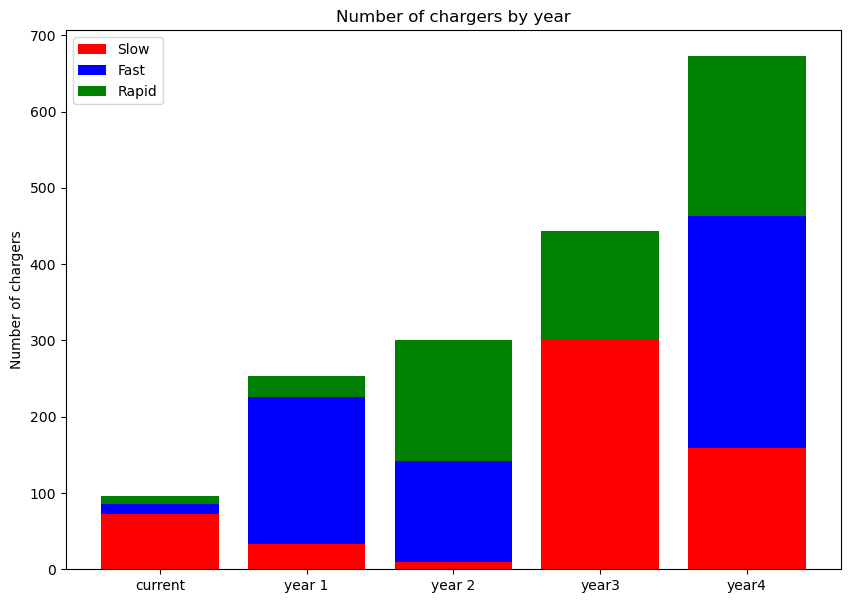

In [88]:
N = 5
ind = np.arange(N)
width = 0.35
slow_chargers = np.array([slow_c_current,location.getSolution(xp.Sum(x1[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x1[1,i] for i in grids)),location.getSolution(xp.Sum(x1[2,i] for i in grids)), 
                 location.getSolution(xp.Sum(x1[3,i] for i in grids))])
fast_chargers = np.array([fast_c_current,location.getSolution(xp.Sum(x2[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x2[1,i] for i in grids)),location.getSolution(xp.Sum(x2[2,i] for i in grids)), 
                 location.getSolution(xp.Sum(x2[3,i] for i in grids))])
rapid_chargers = np.array([rapid_c_current,location.getSolution(xp.Sum(x3[0,i] for i in grids)),
                 location.getSolution(xp.Sum(x3[1,i] for i in grids)),location.getSolution(xp.Sum(x3[2,i] for i in grids)), 
                  location.getSolution(xp.Sum(x3[3,i] for i in grids))])
fig = plt.subplots(figsize =(10,7))
p1 = plt.bar(ind, slow_chargers, color='r')
p2 = plt.bar(ind, fast_chargers,bottom=slow_chargers, color='b')
p3 = plt.bar(ind, rapid_chargers,bottom=slow_chargers+fast_chargers, color='g')
plt.ylabel('Number of chargers')
plt.title('Number of chargers by year')
plt.xticks(ind, ('current', 'year 1', 'year 2', 'year3', 'year4'))
plt.legend((p1[0],p2[0],p3[0]),('Slow', 'Fast', 'Rapid'))

plt.show()

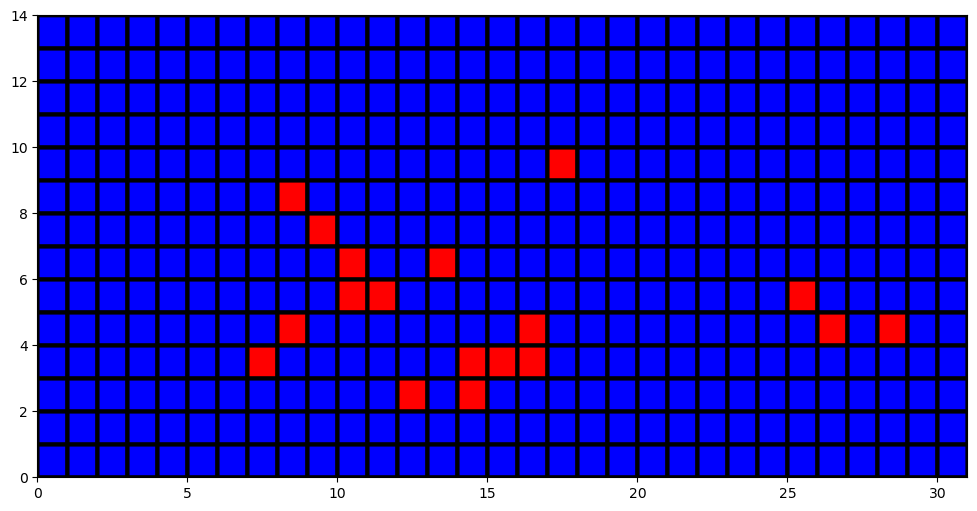

In [93]:
map_T = np.zeros((31, 14))
for i in grids:
    if location.getSolution(xp.Sum(x1[t,i]+x2[t,i]+x3[t,i] for t in years)):
        x = i//14
        y = i %14
        map_T[x , y] = 1


from matplotlib import colors

cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(12,6))
plt.pcolor(map_T.T,cmap=cmap,edgecolors='k', linewidths=3)
plt.show()